#Introduction

We have the network data of all the Network operators in almost all the places of India and their rating by customer in means of the call satisfaction.

Now, here on this project, we will be finding the best operator on any place in India so that we won't get in trouble on travelling to that place.

This dataset captures information related to mobile network call drops. Each entry represents a specific call incident with various attributes describing the context, network parameters, and location.

Data is collected from : https://data.gov.in/files/ogdpv2dms/s3fs-public/datafile/April_MyCall_2023.csv

Columns:

Operator: The mobile network operator involved in the call incident (e.g., RJio, Airtel).

Inout_Travelling: Indicates whether the call was made indoors or outdoors.

Network_Type: The type of network used during the call (e.g., 4G).

Rating: The user rating for the call quality, ranging from 1 to 5.

Calldrop_Category: Categorization of call drop incidents (e.g., Satisfactory).

Latitude and Longitude: Geographical coordinates of the call incident location.

State_Name: The state in which the call incident occurred.

#Data Preprocessing

In [ ]:
import pandas as pd
from collections import Counter
data="https://raw.githubusercontent.com/tinkvu/Datasets/main/April_MyCall_2023.csv"
df=pd.read_csv(data)
print(len(df))
df.head()


475


,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,19.057230,72.833021,Maharashtra
1,Airtel,Indoor,Unknown,5,Satisfactory,12.956612,77.489642,Karnataka
2,Airtel,Indoor,Unknown,5,Satisfactory,12.956479,77.489607,Karnataka
3,Airtel,Indoor,Unknown,5,Satisfactory,12.956479,77.489607,Karnataka
4,RJio,Indoor,4G,5,Satisfactory,15.871033,74.505432,Karnataka


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")


Unique values for 'operator': ['RJio' 'Airtel' 'VI' 'BSNL']
Unique values for 'inout_travelling': ['Indoor' 'Outdoor' 'Travelling']
Unique values for 'network_type': ['4G' 'Unknown' '3G' '2G']
Unique values for 'rating': [4 5 3 1 2]
Unique values for 'calldrop_category': ['Satisfactory' 'Poor Voice Quality' 'Call Dropped']
Unique values for 'latitude': [19.0572298  12.9566116  12.9564792  15.87103333 12.9566365  12.9566177
 12.9566103  30.11197975 18.98152633 -1.         19.0540211  30.1047898
 12.82794155 12.9167662  12.8274826  26.69354271 12.83878677 19.04321857
 23.03264945 23.03290845 15.87138333 12.81777512 12.84629432 12.84650466
 12.8275084  12.8274662  23.03286977 30.1155514  30.1154026  12.84407043
 12.82782477 22.655444   15.87289    19.06957089 23.03340223 10.21515741
  9.9771025  20.92986794 17.49537667 30.1155452  12.907285   30.1047877
 16.48215798 17.46985667 22.6554508  12.9566145  30.1155476  22.64629841
 30.1047888  30.104789   12.9566398  12.9020413  12.95658651 22.

In [ ]:
Counter(df['network_type'])['Unknown']

96

In [ ]:
selected_columns = df[df['network_type'] == '3G'][['network_type', 'rating']]
selected_columns

,network_type,rating
65,3G,3
117,3G,4
118,3G,4
128,3G,4
136,3G,4
167,3G,3
173,3G,3
183,3G,4
184,3G,4
185,3G,4


In [ ]:
df.loc[(df['network_type'] == 'Unknown') & (df['rating'] >= 4), 'network_type'] = '4G'
df.loc[(df['network_type'] == 'Unknown') & (df['rating'] < 4), 'network_type'] = '3G'
Counter(df['network_type'])['Unknown']
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,19.057230,72.833021,Maharashtra
1,Airtel,Indoor,4G,5,Satisfactory,12.956612,77.489642,Karnataka
2,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
3,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
4,RJio,Indoor,4G,5,Satisfactory,15.871033,74.505432,Karnataka


In [ ]:
df[df['state_name'].isnull()]
df = df.dropna(subset=['state_name'])

df

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,19.057230,72.833021,Maharashtra
1,Airtel,Indoor,4G,5,Satisfactory,12.956612,77.489642,Karnataka
2,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
3,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
4,RJio,Indoor,4G,5,Satisfactory,15.871033,74.505432,Karnataka
...,...,...,...,...,...,...,...,...
470,BSNL,Travelling,4G,5,Satisfactory,26.915011,81.007739,Uttar Pradesh
471,BSNL,Travelling,4G,5,Satisfactory,26.872824,80.991630,Uttar Pradesh
472,RJio,Travelling,4G,4,Satisfactory,26.890440,75.810287,Rajasthan
473,RJio,Travelling,4G,5,Satisfactory,23.032709,79.017372,Madhya Pradesh


Network Type Classification:


Target Variable: network_type
Features: operator, inout_travelling, rating, latitude, longitude, state_name
Objective: Predict the network type (e.g., 3G, 4G, Unknown) based on other features.

In [ ]:
df.head()


,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,RJio,Indoor,4G,4,Satisfactory,19.057230,72.833021,Maharashtra
1,Airtel,Indoor,4G,5,Satisfactory,12.956612,77.489642,Karnataka
2,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
3,Airtel,Indoor,4G,5,Satisfactory,12.956479,77.489607,Karnataka
4,RJio,Indoor,4G,5,Satisfactory,15.871033,74.505432,Karnataka


In [ ]:
#dfnum=df[['rating','latitude','longitude']]
dfcat=df[['inout_travelling','network_type','calldrop_category','state_name']]
dfcat.head()

,inout_travelling,network_type,calldrop_category,state_name
0,Indoor,4G,Satisfactory,Maharashtra
1,Indoor,4G,Satisfactory,Karnataka
2,Indoor,4G,Satisfactory,Karnataka
3,Indoor,4G,Satisfactory,Karnataka
4,Indoor,4G,Satisfactory,Karnataka


In [ ]:
dfcat_encoded = pd.get_dummies(dfcat)
df_encoded = pd.concat([df[['rating', 'latitude', 'longitude','operator']], dfcat_encoded], axis=1)
df_encoded.head()

,rating,latitude,longitude,operator,inout_travelling_Indoor,inout_travelling_Outdoor,inout_travelling_Travelling,network_type_2G,network_type_3G,network_type_4G,...,state_name_Karnataka,state_name_Kerala,state_name_Madhya Pradesh,state_name_Maharashtra,state_name_Rajasthan,state_name_Tamil Nadu,state_name_Telangana,state_name_Uttar Pradesh,state_name_Uttarakhand,state_name_West Bengal
0,4,19.057230,72.833021,RJio,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5,12.956612,77.489642,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,5,12.956479,77.489607,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,5,12.956479,77.489607,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,5,15.871033,74.505432,RJio,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.columns

Index(['rating', 'latitude', 'longitude', 'operator',
       'inout_travelling_Indoor', 'inout_travelling_Outdoor',
       'inout_travelling_Travelling', 'network_type_2G', 'network_type_3G',
       'network_type_4G', 'calldrop_category_Call Dropped',
       'calldrop_category_Poor Voice Quality',
       'calldrop_category_Satisfactory', 'state_name_Andhra Pradesh',
       'state_name_Bihar', 'state_name_Gujarat', 'state_name_Karnataka',
       'state_name_Kerala', 'state_name_Madhya Pradesh',
       'state_name_Maharashtra', 'state_name_Rajasthan',
       'state_name_Tamil Nadu', 'state_name_Telangana',
       'state_name_Uttar Pradesh', 'state_name_Uttarakhand',
       'state_name_West Bengal'],
      dtype='object')

In [ ]:
df_encoded.to_csv('ecodeddata.csv', index=False)

#1. Bagging

In [ ]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [ ]:
df=pd.read_csv('/content/ecodeddata.csv')
df.head()

,rating,latitude,longitude,operator,inout_travelling_Indoor,inout_travelling_Outdoor,inout_travelling_Travelling,network_type_2G,network_type_3G,network_type_4G,...,state_name_Karnataka,state_name_Kerala,state_name_Madhya Pradesh,state_name_Maharashtra,state_name_Rajasthan,state_name_Tamil Nadu,state_name_Telangana,state_name_Uttar Pradesh,state_name_Uttarakhand,state_name_West Bengal
0,4,19.057230,72.833021,RJio,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,5,12.956612,77.489642,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,5,12.956479,77.489607,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,5,12.956479,77.489607,Airtel,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,5,15.871033,74.505432,RJio,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
X= df.drop('operator', axis=1)
y=df['operator']
X.head(2)

,rating,latitude,longitude,inout_travelling_Indoor,inout_travelling_Outdoor,inout_travelling_Travelling,network_type_2G,network_type_3G,network_type_4G,calldrop_category_Call Dropped,...,state_name_Karnataka,state_name_Kerala,state_name_Madhya Pradesh,state_name_Maharashtra,state_name_Rajasthan,state_name_Tamil Nadu,state_name_Telangana,state_name_Uttar Pradesh,state_name_Uttarakhand,state_name_West Bengal
0,4,19.057230,72.833021,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,5,12.956612,77.489642,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
clf1 = GaussianNB()
clf2 = LogisticRegression( )
clf3 = SVC(random_state=42)

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

import warnings
warnings.filterwarnings("ignore")

label = ['Naive Bayes', 'LR','SVC','Bagging NB', 'Bagging LR', 'Bagging SVC']
clf_list = [clf1, clf2,clf3, bagging1, bagging2, bagging3]

best_score = 0

for clf, label  in zip(clf_list, label ):
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy:  ",(label,scores.mean(), scores.std()))

    if scores.mean() > best_score:
        best_score = scores.mean()
        best_model = (label, clf)

print(f"\nBest Model {best_model[0]} with Accuracy: {best_score}")

Accuracy:   ('Naive Bayes', 0.7205535205535205, 0.04535657530409225)
Accuracy:   ('LR', 0.8049654049654049, 0.06046453715556622)
Accuracy:   ('SVC', 0.5330891330891331, 0.004489566864676477)
Accuracy:   ('Bagging NB', 0.7425722425722426, 0.05140384526674998)
Accuracy:   ('Bagging LR', 0.7682539682539682, 0.039948950743614466)
Accuracy:   ('Bagging SVC', 0.8159951159951161, 0.060431296533001416)

Best Model Bagging SVC with Accuracy: 0.8159951159951161


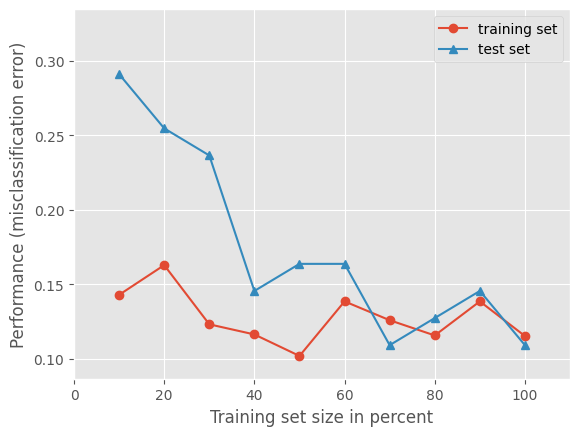

In [ ]:

#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging3, print_model=False, style='ggplot')
plt.show()

In [ ]:
# Ensemble Size
num_est = np.arange(10, 100, 10)

# Lists to store mean and standard deviation of cross-validated scores for each ensemble size
bg_clf_cv_mean = []
bg_clf_cv_std = []

# Loop over different ensemble sizes
for i in num_est:
    # Creat e a Bagging Classifier with the specified base estimator , ensemble size (n_estimators=i),
    # and other parameters (max_samples=0.8, max_features=0.8)
    bg_clf = BaggingClassifier(base_estimator=bagging3, n_estimators=i, max_samples=0.8, max_features=0.8)

    # Perform cross-validation and calculate accuracy scores
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')

    # Store the mean and standard deviation of the accuracy scores
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

# bg_clf_cv_std is a list containing the standard deviation of cross-validated accuracy scores for each ensemble size
bg_clf_cv_std

[0.05768607314285433,
 0.06289506225510676,
 0.07837435122852192,
 0.06331071541460707,
 0.058637332715175024,
 0.06374400822879828,
 0.07067451615249634,
 0.04998617879427913,
 0.06886167849781756]

#2. Boosting

* Create a boosting classifier with a mixture of Naive Bayes as a first weaker model, Logistic Regression as the second base model, and decision tree classifier as the third classifier. Define your created model as MB().

* Train MB() with 80/20 using your proposed dataset

* Compare the performance of MB() versus bagging classifier in Example one and other base classifiers. Select the best model in terms of RECALL.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_classifiers = [
    GaussianNB(),
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

bg_clf_cv_mean = []
bg_clf_cv_std = []
print(f'Recall on the test set using Adaboost:\n')
# Loop over different base classifiers
for base_classifier in base_classifiers:
    # Create a boosting classifier with the current base classifier
    MB = AdaBoostClassifier(
        base_estimator=base_classifier,
        n_estimators=50,
        random_state=42
    )

    # Train the boosting classifier
    MB.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = MB.predict(X_test)
    scores = cross_val_score(MB, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())
    recall = recall_score(y_test, y_pred, average='weighted')
    print(f'{base_classifier.__class__.__name__}:{recall}')

print(f"\nBest Model from Bagging: {best_model[0]} with Accuracy: {best_score}")

Recall on the test set using Adaboost:

GaussianNB:0.8545454545454545
LogisticRegression:0.8181818181818182
DecisionTreeClassifier:0.9636363636363636

Best Model from Bagging: Bagging SVC with Accuracy: 0.8159951159951161


Now we have got more accuracy for the model Decision Tree Classifier when we used Adaptive Boosting technique. And in which we got 96.3% accuracy on Decision Tree Classifier.

#3. Stacking

*Create a stacking classifier with a mixture of Naive Bayes, Logistic Regression, and SVC.

*Train your classifier with 80/20 using your proposed dataset

*compare the trained classifier versus the mixture bagging and boosting and specify the best ensemble approach in terms of accuracy.

>lr 0.839 (0.068)
>svm 0.533 (0.016)
>bayes 0.762 (0.059)
>stacking 0.855 (0.054)


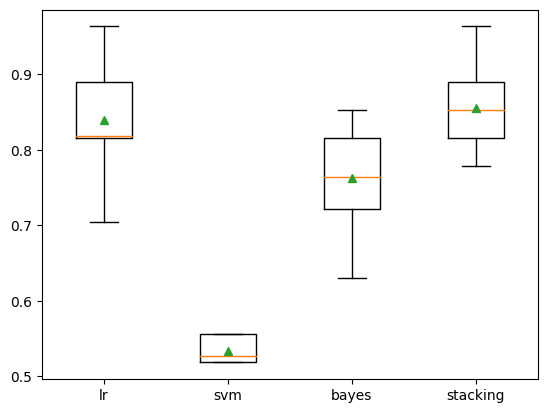

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import std, mean
# get a stacking ensemble of models
def get_stacking():
	# define the base models: level0 models
	level0 = list()
	level0.append(('lr', LogisticRegression()))
	#level0.append(('cart', DecisionTreeClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model: level 1
	level1 = LogisticRegression()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

# get a list of models to evaluate
def get_models():
	models = dict()
	models['lr'] = LogisticRegression()

	#models['cart'] = DecisionTreeClassifier()
	models['svc'] = SVC()
	models['bayes'] = GaussianNB()
	models['stacking'] = get_stacking()
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#Conclusion

From doing all these ensemble model techniques on this Network Dataset, the best accurate model that worked is **DecisionTreeClassifier when boosted using AdaBoost with an accuracy of 96.3%.**

So, we can use this Adaboosted Decision Tree Classifier as the best working model for this Network Dataset.

    MB = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(),
        n_estimators=50,
        random_state=42
    )
    MB.fit(X_train, y_train)

```
# This is formatted as code
```

